In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from mat4py import loadmat

In [2]:
N = 10000
x_values = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
    

full_signal_values = (y_values_0 + y_values_1 - y_values_2)
full_signal_fft_values = fft(full_signal_values)
full_signal_fft_values = (2/N) * np.abs(full_signal_fft_values)


Text(8, 3, 'Second\ncomponent')

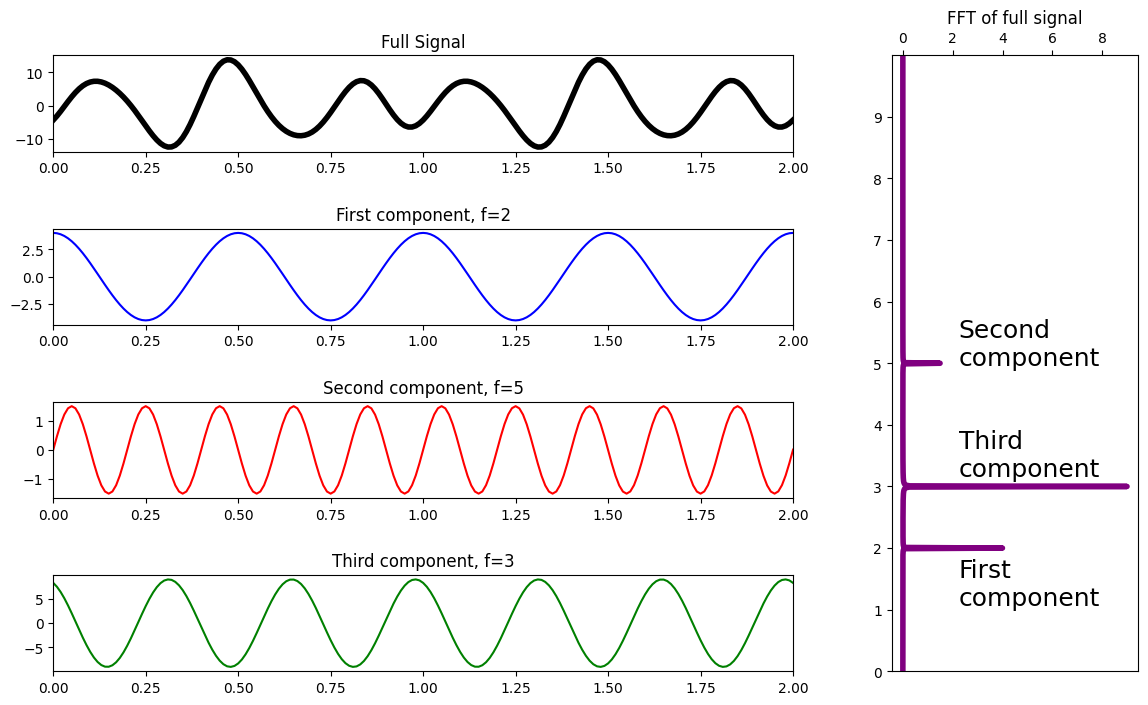

In [3]:
# Plot FFT results of synthetic data

fig = plt.figure(figsize=(14, 8))
widths = [3, 1]
heights = [1, 1, 1, 1]
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.8, width_ratios=widths, height_ratios=heights)

full_signal = fig.add_subplot(grid[0, 0])
first_comp = fig.add_subplot(grid[1, 0])
second_comp = fig.add_subplot(grid[2, 0])
third_comp = fig.add_subplot(grid[3, 0])
fft_result = fig.add_subplot(grid[0:, 1])

#Synthetic data
full_signal.plot(list(x_values), list(full_signal_values), color='black', linewidth=4)
full_signal.set_xlim(0, 2)
full_signal.set_title('Full Signal')
first_comp.plot(list(x_values), list(y_values_0), color = 'blue')
first_comp.set_xlim(0, 2)
first_comp.set_title('First component, f=2')
second_comp.plot(list(x_values), list(y_values_1), color = 'red')
second_comp.set_xlim(0, 2)
second_comp.set_title('Second component, f=5')
third_comp.plot(list(x_values), list(y_values_2), color = 'green')
third_comp.set_xlim(0, 2)
third_comp.set_title('Third component, f=3')

#FFT
fft_result.xaxis.tick_top()
fft_result.plot(list(full_signal_fft_values), list(x_values), color = 'purple', linewidth=4)
fft_result.set_ylim(0, 10)
fft_result.set_yticks(np.arange(0, 10, step=1))
fft_result.set_title('FFT of full signal')
fft_result.annotate('First\ncomponent',
            xy=(1.8, 1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)
fft_result.annotate('Third\ncomponent',
            xy=(1.8, 3.1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

fft_result.annotate('Second\ncomponent',
            xy=(1.8, 4.9), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)


In [4]:
data = loadmat("ECGData/ECGData.mat")

ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]


Text(0.5, 1.0, 'NSR Signal')

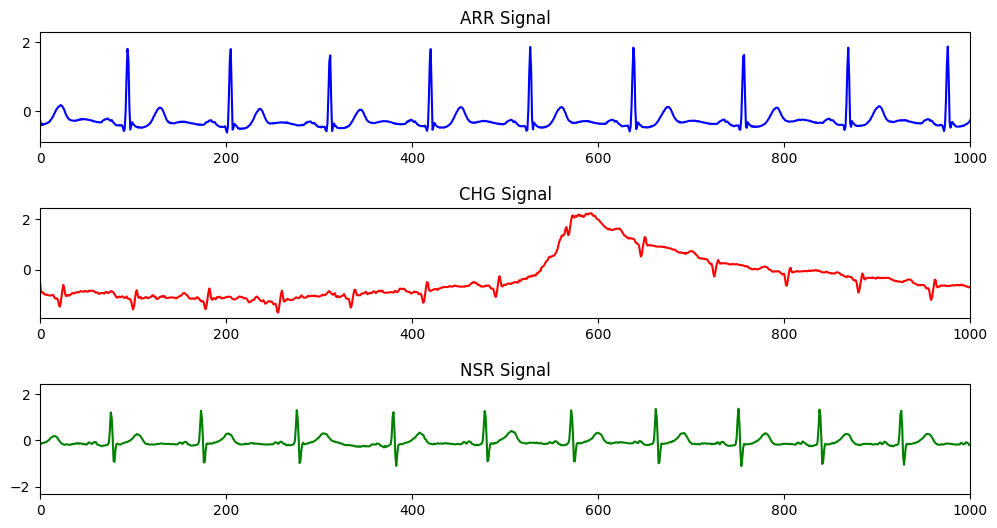

In [5]:
# Data Visualization

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

Text(0.5, 1.0, 'FFT of full signal')

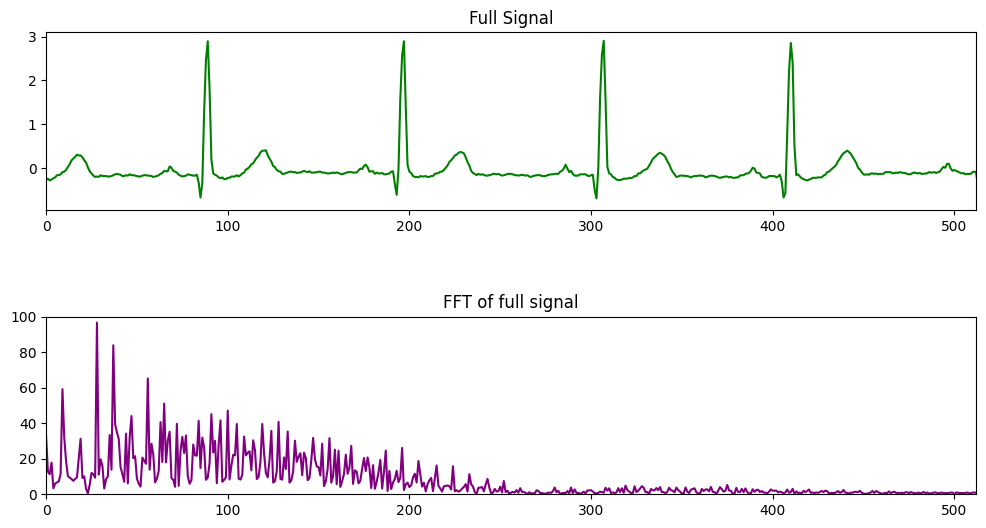

In [6]:
#Arr signal Fourier Transform
nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')